## Exercise 1: Convolution

Rezultat konvolucije: [1.5  1.8  1.3  0.65 0.95 0.81 0.35 0.06 0.5  1.  ]
Rezultat konvolucije (numpy): [1.5  1.8  1.3  0.65 0.95 0.81 0.35 0.06 0.5  1.  ]


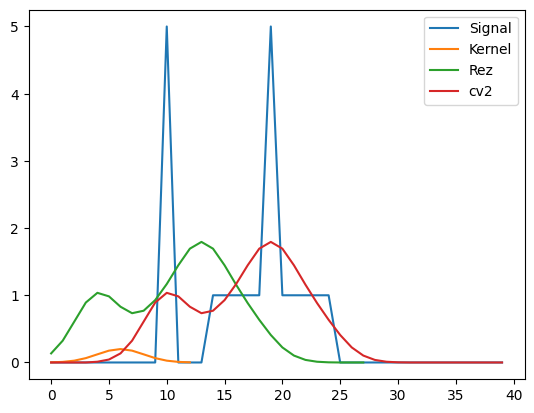

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
import cv2
import a2_utils
import os

def simple_convolution(signal, kernel):
    N = len(kernel) // 2
    rez = []

    for i in range(N, len(signal) - N):
        value = 0
        for j in range(len(kernel)):
            #print('i:', i, 'j:', j, 'i-j:', i-j)
            value += kernel[j] * signal[i - j + N]
        rez.append(value)

    return np.array(rez)

signal1 = [0, 1, 1, 1, 0, 0.7, 0.5, 0.2, 0, 0, 1, 0]
kernel1 = [0.5, 1, 0.3]

rez1 = simple_convolution(signal1, kernel1)
print("Rezultat konvolucije:", rez1)
print("Rezultat konvolucije (numpy):", np.convolve(signal1, kernel1, 'valid'))

signal = a2_utils.read_data('signal.txt')
kernel = a2_utils.read_data('kernel.txt')

rez = simple_convolution(signal, kernel)

conv_cv2 = cv2.filter2D(signal.astype(np.float32), -1, kernel)

plt.plot(signal, label='Signal')
plt.plot(kernel, label='Kernel')
plt.plot(rez, label='Rez')
plt.plot(conv_cv2, label='cv2')
plt.legend()
plt.show()

### Can you recognize the shape of the kernel? What is the sum of the elements in the kernel? How does the kernel affect the signal?

Jedro ima simetrično obliko okoli središča. Vsota elementov v jedru je 1. Jedro zmanjša šum v signalu brez bistvenih sprememb oblike signala.

V našem primeru jedro nima vsote 1 in ni simetrično.



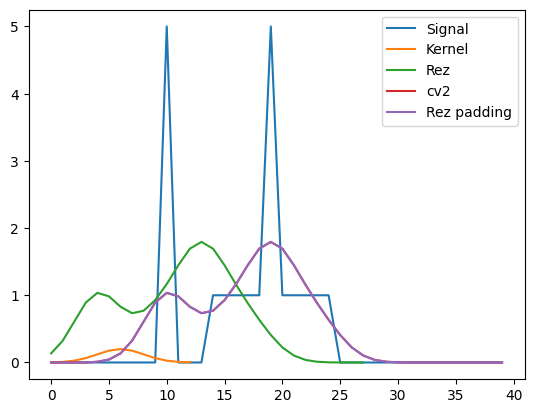

In [2]:
def simple_convolution_padding(signal, kernel):
    N = len(kernel) // 2
    rez = []

    #signal = np.pad(signal, N, mode='constant')
    signal = np.pad(signal, N, mode='edge')

    for i in range(N, len(signal) - N):
        value = 0
        for j in range(len(kernel)):
            value += kernel[j] * signal[i - j + N]
            #print('i:', i, 'j:', j, 'kernel[j]:', kernel[j], 'signal[i - j + N]:', signal[i - j + N], 'value:', value)
        rez.append(value)

    return np.array(rez)

rez = simple_convolution(signal, kernel)
rez_pad = simple_convolution_padding(signal, kernel)
#print("Rezultat konvolucije:", rez)
#print("Rezultat konvolucije z paddingom:", rez_pad)

plt.plot(signal, label='Signal')
plt.plot(kernel, label='Kernel')
plt.plot(rez, label='Rez')
plt.plot(conv_cv2, label='cv2')
plt.plot(rez_pad, label='Rez padding')
plt.legend()
plt.show()

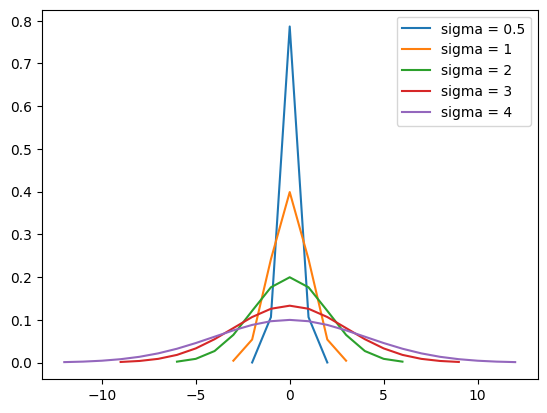

In [3]:
def gauss(sigma):
    N = 2 * math.ceil(3 * sigma) + 1

    kernel = []
    for i in range(-N // 2+1, N // 2 + 1):
        value = 1 / (sigma * math.sqrt(2 * math.pi)) * math.exp(-i ** 2 / (2 * sigma ** 2))
        kernel.append(value)
    
    kernel = np.array(kernel)
    kernel /= np.sum(kernel)
    return kernel

kernel_05 = gauss(0.5)
kernel_1 = gauss(1)
kernel_2 = gauss(2)
kernel_3 = gauss(3)
kernel_4 = gauss(4)


plt.plot(np.arange(-len(kernel_05) // 2 + 1, len(kernel_05) // 2 + 1), kernel_05, label='sigma = 0.5')
plt.plot(np.arange(-len(kernel_1) // 2 + 1, len(kernel_1) // 2 + 1), kernel_1, label='sigma = 1')
plt.plot(np.arange(-len(kernel_2) // 2 + 1, len(kernel_2) // 2 + 1), kernel_2, label='sigma = 2')
plt.plot(np.arange(-len(kernel_3) // 2 + 1, len(kernel_3) // 2 + 1), kernel_3, label='sigma = 3')
plt.plot(np.arange(-len(kernel_4) // 2 + 1, len(kernel_4) // 2 + 1), kernel_4, label='sigma = 4')
plt.legend()
plt.show()

### The figure below shows two kernels (a) and (b) as well as signal (c). Sketch (do not focus on exact proportions of your drawing, but rather on the understanding of what you are doing) the resulting convolved signal of the given input signal and each kernel.



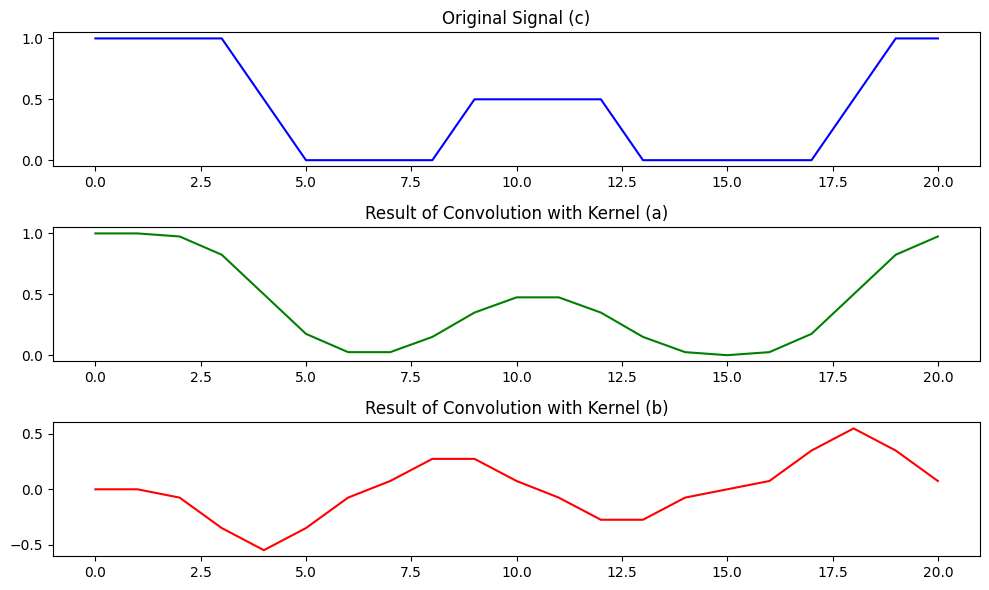

In [4]:
kernel_a = np.array([0, 0.05, 0.25, 0.4, 0.25, 0.05, 0])
kernel_b = np.array([0, 0.15, 0.4, 0, -0.4, -0.15, 0])
signal_c = np.array([1, 1, 1, 1, 0.5, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0, 0.5, 1, 1])

conv_a = simple_convolution_padding(signal_c, kernel_a)
conv_b = simple_convolution_padding(signal_c, kernel_b)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(signal_c, color='blue')
plt.title("Original Signal (c)")

plt.subplot(3, 1, 2)
plt.plot(conv_a, color='green')
plt.title("Result of Convolution with Kernel (a)")

plt.subplot(3, 1, 3)
plt.plot(conv_b, color='red')
plt.title("Result of Convolution with Kernel (b)")

plt.tight_layout()
plt.show()

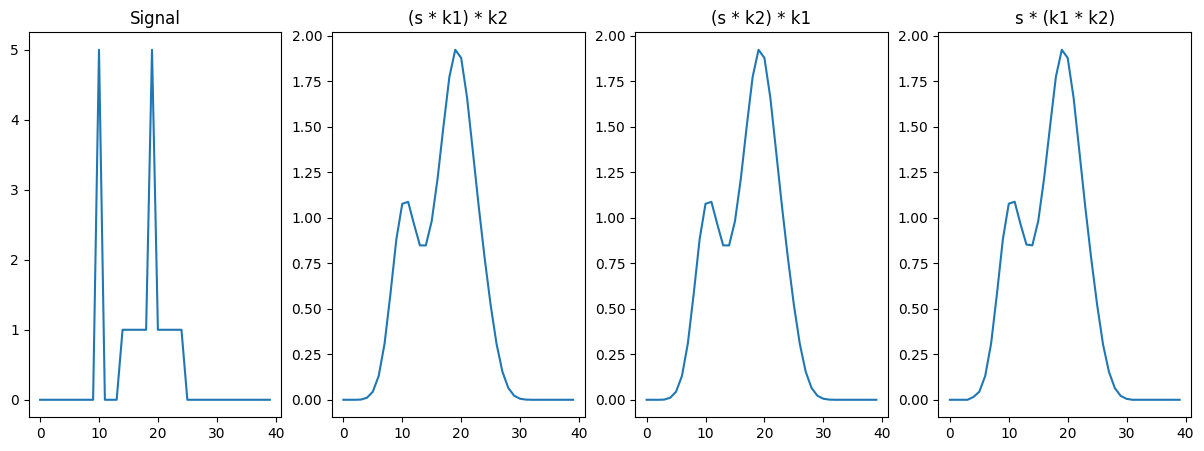

In [5]:
signal = np.loadtxt('signal.txt')
k1 = gauss(2)
k2 = [0.1 , 0.6 , 0.4]

conv1 = simple_convolution_padding(signal, k1)
conv1 = simple_convolution_padding(conv1, k2) #(s * k1) * k2

conv2 = simple_convolution_padding(signal, k2)
conv2 = simple_convolution_padding(conv2, k1) #(s * k2) * k1

k1k2 = simple_convolution_padding(k1, k2)
conv3 = simple_convolution_padding(signal, k1k2) #s * (k1 * k2)

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.plot(signal)
plt.title('Signal')

plt.subplot(1,4,2)
plt.plot(conv1)
plt.title('(s * k1) * k2')

plt.subplot(1,4,3)
plt.plot(conv2)
plt.title('(s * k2) * k1')

plt.subplot(1,4,4)
plt.plot(conv3)
plt.title('s * (k1 * k2)')

plt.show()

## Exercise 2: Image filtering

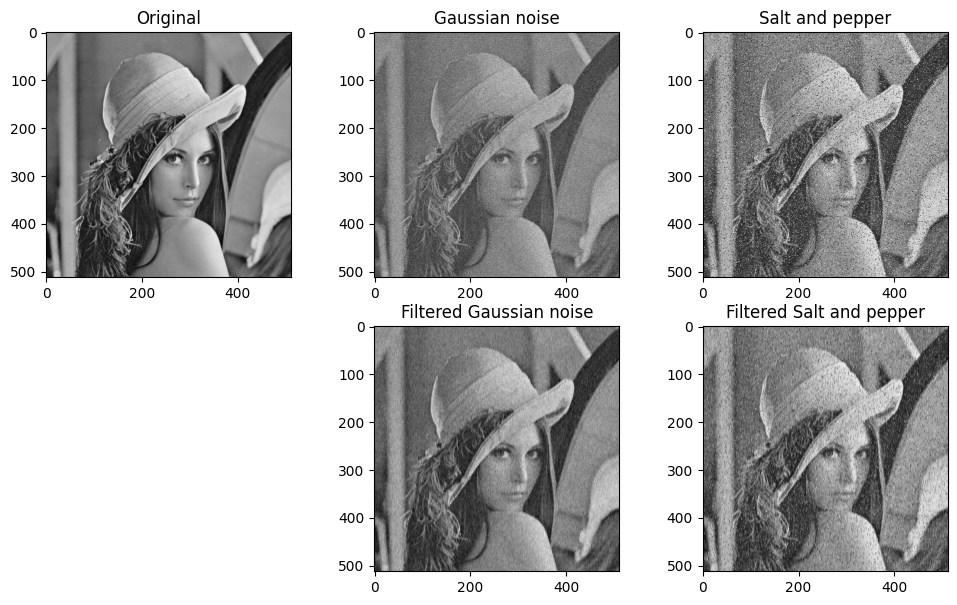

In [6]:
def greyscale(image):
    return image[:, :, 0] / 3 + image[:, :, 1] / 3 + image[:, :, 2] / 3

def gaussfilter(image, sigma):
    kernel = gauss(sigma)
    image = cv2.filter2D(image, -1, kernel)
    image = cv2.filter2D(image, -1, kernel.T)
    return image

image = plt.imread('./images/lena.png').astype(np.float64)
image = greyscale(image)

image_noise = a2_utils.gauss_noise(image)
image_sp = a2_utils.sp_noise(image)

image_gauss_filtered = gaussfilter(image_noise, 1)
image_sp_filtered = gaussfilter(image_sp, 1)

plt.figure(figsize=(12, 7))

plt.subplot(2,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(2,3,2)
plt.imshow(image_noise, cmap='gray')
plt.title('Gaussian noise')

plt.subplot(2,3,3)
plt.imshow(image_sp, cmap='gray')
plt.title('Salt and pepper')

plt.subplot(2,3,5)
plt.imshow(image_gauss_filtered, cmap='gray')
plt.title('Filtered Gaussian noise')

plt.subplot(2,3,6)
plt.imshow(image_sp_filtered, cmap='gray')
plt.title('Filtered Salt and pepper')

plt.show()

### Which noise is better removed using the Gaussian filter?

Gaussov filter bolje odstrani Gaussov šum, saj je zasnovan za odstranjevanje zveznih, naključnih motenj. Pri šumu "Salt and pepper" pa Gaussov filter ni tako učinkovit.

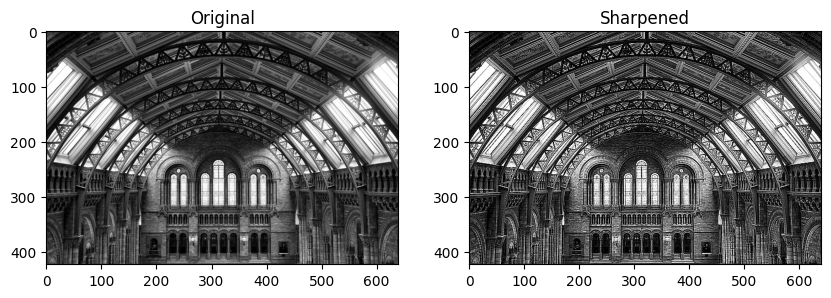

In [7]:
def sharpen(image):
    kernel = np.array([[0, 0, 0],
                        [0, 2, 0],
                        [0, 0, 0]], dtype=np.float64)
    
    kernel2 = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]], dtype=np.float64) / 9

    kernel = kernel - kernel2

    image = cv2.filter2D(image, -1, kernel)
    image = cv2.filter2D(image, -1, kernel.T)
    image = np.clip(image, 0, 1)
    
    #print(image)

    return image

image_muzej = plt.imread('./images/museum.jpg').astype(np.float64) / 255
image_muzej = greyscale(image_muzej)

image_muzej_sharpened = sharpen(image_muzej)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(image_muzej, cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(image_muzej_sharpened, cmap='gray')
plt.title('Sharpened')

plt.show()

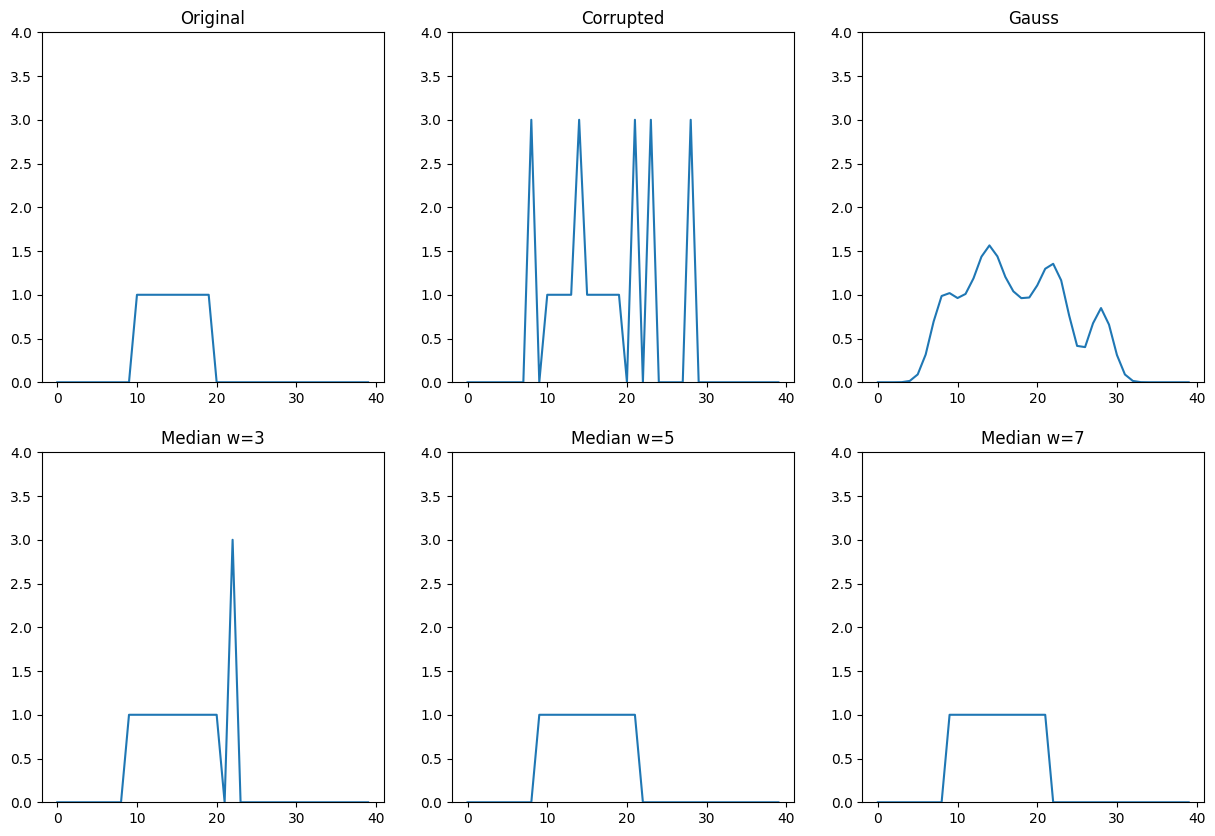

In [11]:
def salt_and_pepper(signal, p):
    assert np.max(signal) <= 1
    assert signal.dtype == np.float64

    res = np.copy(signal)

    salt_mask = np.random.rand(*signal.shape) < (p / 2)
    pepper_mask = np.random.rand(*signal.shape) < (p / 2)

    res[salt_mask] = 3
    res[pepper_mask] = 0

    return res

def simple_median(I, w):
    N = w // 2
    rez = []
    I = np.pad(I, N, mode='edge')
    for i in range(N, len(I) - N):
        okno = I[i - N:i + N + 1]
        medijana = np.median(okno)
        rez.append(medijana)

    return np.array(rez)

signal = np.zeros(40)
signal[10:20] = 1
signal_sp = salt_and_pepper(signal, 0.25)
signal_sp[0] = 0
signal_sp[-1] = 0

signal_filter_3 = simple_median(signal_sp, 3)
signal_filter_5 = simple_median(signal_sp, 5)
signal_filter_7 = simple_median(signal_sp, 7)

signal_gauss = gaussfilter(signal_sp, 1)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(signal)
plt.title('Original')

plt.subplot(2, 3, 2)
plt.plot(signal_sp)
plt.title('Corrupted')

plt.subplot(2, 3, 3)
plt.plot(signal_gauss)
plt.title('Gauss')

plt.subplot(2, 3, 4)
plt.plot(signal_filter_3)
plt.title('Median w=3')

plt.subplot(2, 3, 5)
plt.plot(signal_filter_5)
plt.title('Median w=5')

plt.subplot(2, 3, 6)
plt.plot(signal_filter_7)
plt.title('Median w=7')

for ax in plt.gcf().get_axes():
    ax.set_ylim(0, 4)
plt.show()

### Which filter performs better at this specific task? In comparison to Gaussian filter that can be applied multiple times in any order, does the order matter in case of median filter? What is the name of filters like this?

Za odstranjevanje šuma "Salt and pepper" je boljši median filter. Pri Gaussovem filterju vrstni red zaporednih operacij ni pomemben, pri median filterju pa je vrstni red zaporednih operacij pomemben. Filtri, pri katerih je vrstni red zaporednih operacij pomemben, se imenujejo nelinearni filtri.

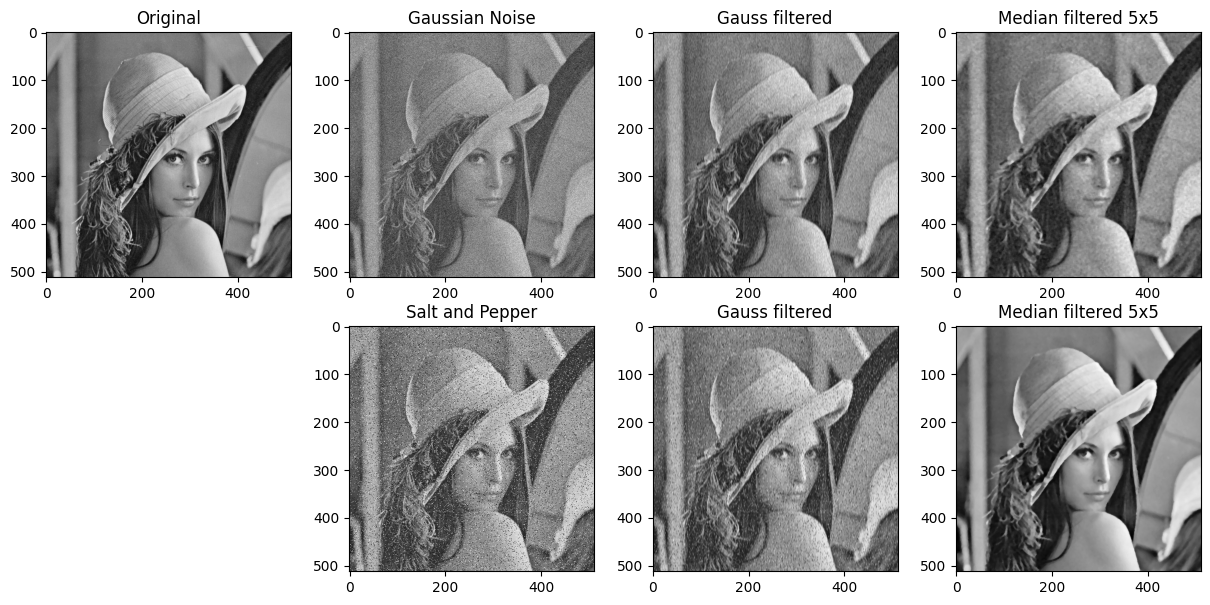

In [15]:
def median_filter_2d(image, size):
    N = size // 2
    image_padded = np.pad(image, N, mode='edge')
    image_filtered = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            okno = image_padded[i:i + size, j:j + size]
            image_filtered[i, j] = np.median(okno)
    
    return image_filtered

image = plt.imread('./images/lena.png').astype(np.float64)
image = greyscale(image)

image_noise = a2_utils.gauss_noise(image)
image_sp = a2_utils.sp_noise(image)

image_noise_median_5 = median_filter_2d(image_noise, size=5)
image_sp_median_5 = median_filter_2d(image_sp, size=5)

image_noise_gauss = gaussfilter(image_noise, sigma=1)
image_sp_gauss = gaussfilter(image_sp, sigma=1)

plt.figure(figsize=(15, 7))

plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(2, 4, 2)
plt.imshow(image_noise, cmap='gray')
plt.title('Gaussian Noise')

plt.subplot(2, 4, 3)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title('Gauss filtered')

plt.subplot(2, 4, 4)
plt.imshow(image_noise_median_5, cmap='gray')
plt.title('Median filtered 5x5')

plt.subplot(2, 4, 6)
plt.imshow(image_sp, cmap='gray')
plt.title('Salt and Pepper')

plt.subplot(2, 4, 7)
plt.imshow(image_sp_gauss, cmap='gray')
plt.title('Gauss filtered')

plt.subplot(2, 4, 8)
plt.imshow(image_sp_median_5, cmap='gray')
plt.title('Median filtered 5x5')

plt.show()

### What is the computational complexity of the Gaussian filter operation? How about the median filter? What does it depend on? Describe the computational complexity using the O(.) notation (you can assume n log n complexity for sorting).

Gaussov filter izvaja konvolucijo, pri kateri se vsak piksel množi z utežmi jedra v lokalni okolici. Računska zahtevnost Gaussovega filtra za sliko s N (N = visina * sirina) piksli in jedrom fiksne velikosti 𝑘*k je O(N*k^2). Običajno je k majhen (npr. 3x3 ali 5x5), zato je približna zahtevnost O(N).

Median filter prav tako deluje na lokalni okolici vsakega piksla, vendar namesto računanja utežene vsote razvrsti vrednosti pikslov znotraj okna in izračuna mediano. Za jedro velikosti k*k iskanje mediane zahteva razvrščanje k^2 elementov. Zato je zahtevnost za vsak piksel O(k^2 * logk^2). Za sliko s N piksli je skupna zahtevnost O(N*k^2 *logk^2). Ker je k majhen v primerjavi z N (npr. 3 ali 5), je računska zahtevnost enaka O(NlogN).

Računska zahtevnost mediane filtra je torej odvisna tako od velikosti jedra kot tudi od postopka razvrščanja (v našem primeru O(NlogN)).

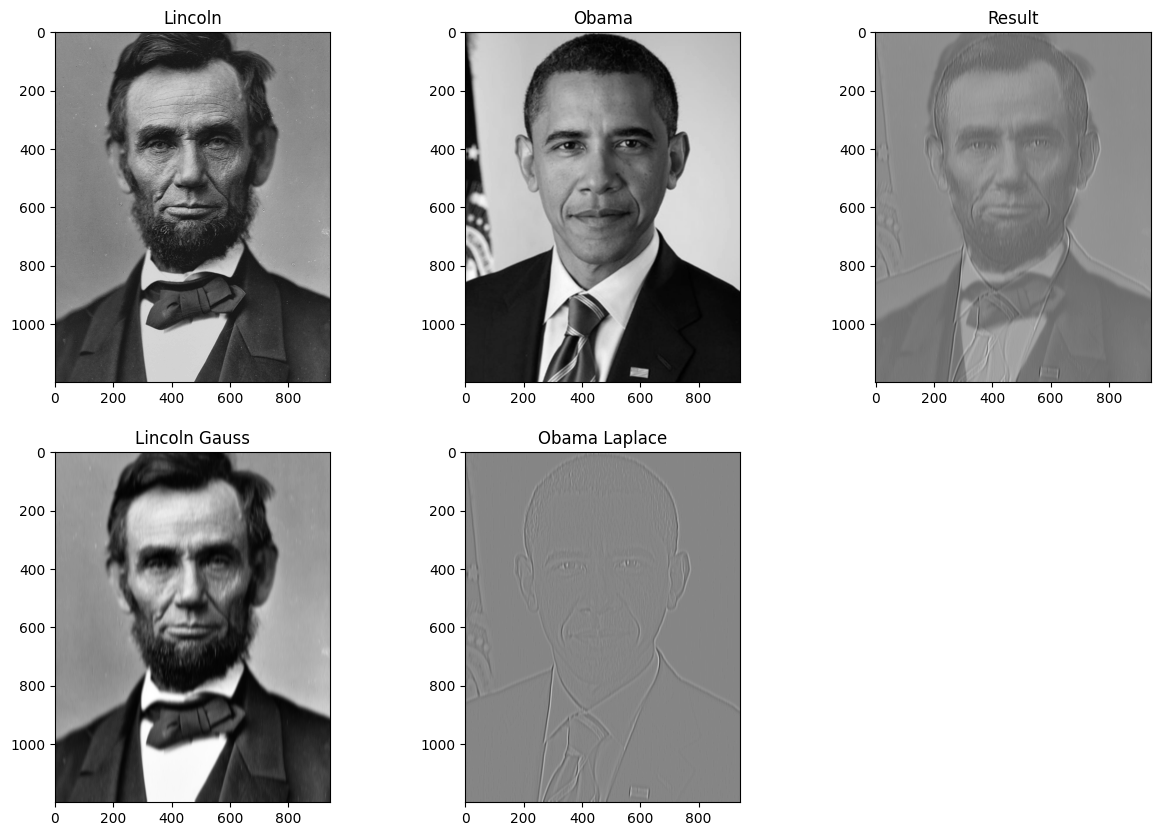

In [ ]:
def laplacian_filter(image):
    kernel = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])
    
    image = cv2.filter2D(image, -1, kernel)
    kernel2 = gauss(2) * - 1
    image = cv2.filter2D(image, -1, kernel2)
    image = np.clip(image, 0, 1)

    return image

def hybrid_image(image1, image2):
    hybrid = 0.06 * image1 + 0.94 * image2
    hybrid = np.clip(hybrid, 0, 1)
    
    return hybrid

image_lincoln = plt.imread('./images/lincoln.jpg').astype(np.float64) / 255
image_obama = plt.imread('./images/obama.jpg').astype(np.float64) / 255

image_lincoln = greyscale(image_lincoln)
image_lincoln = np.clip(image_lincoln, 0, 1)
image_obama = greyscale(image_obama)

image_lincoln_gauss = gaussfilter(image_lincoln, 4)
image_obama_laplace = laplacian_filter(image_obama)
hybrid = hybrid_image(image_lincoln_gauss, image_obama_laplace)

# Display images
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_lincoln, cmap='gray')
plt.title('Lincoln')

plt.subplot(2, 3, 2)
plt.imshow(image_obama, cmap='gray')
plt.title('Obama')

plt.subplot(2, 3, 3)
plt.imshow(hybrid, cmap='gray')
plt.title('Result')

plt.subplot(2, 3, 4)
plt.imshow(image_lincoln_gauss, cmap='gray')
plt.title('Lincoln Gauss')

plt.subplot(2, 3, 5)
plt.imshow(image_obama_laplace, cmap='gray')
plt.title('Obama Laplace')

plt.show()

## Exercise 3: Global approach to image description

In [17]:
def myhist3(image, n_bins):
    H = np.zeros((n_bins, n_bins, n_bins))

    sirina = 1.0 / n_bins

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            R, G, B = image[i, j]

            r_bin = int(R // sirina)
            g_bin = int(G // sirina)
            b_bin = int(B // sirina)

            if r_bin == n_bins:
                r_bin = n_bins - 1
            if g_bin == n_bins:
                g_bin = n_bins - 1
            if b_bin == n_bins:
                b_bin = n_bins - 1

            H[r_bin, g_bin, b_bin] += 1

    H /= np.sum(H)

    return H

image = plt.imread('./images/lena.png').astype(np.float64)
n_bins = 8
histogram = myhist3(image, n_bins)

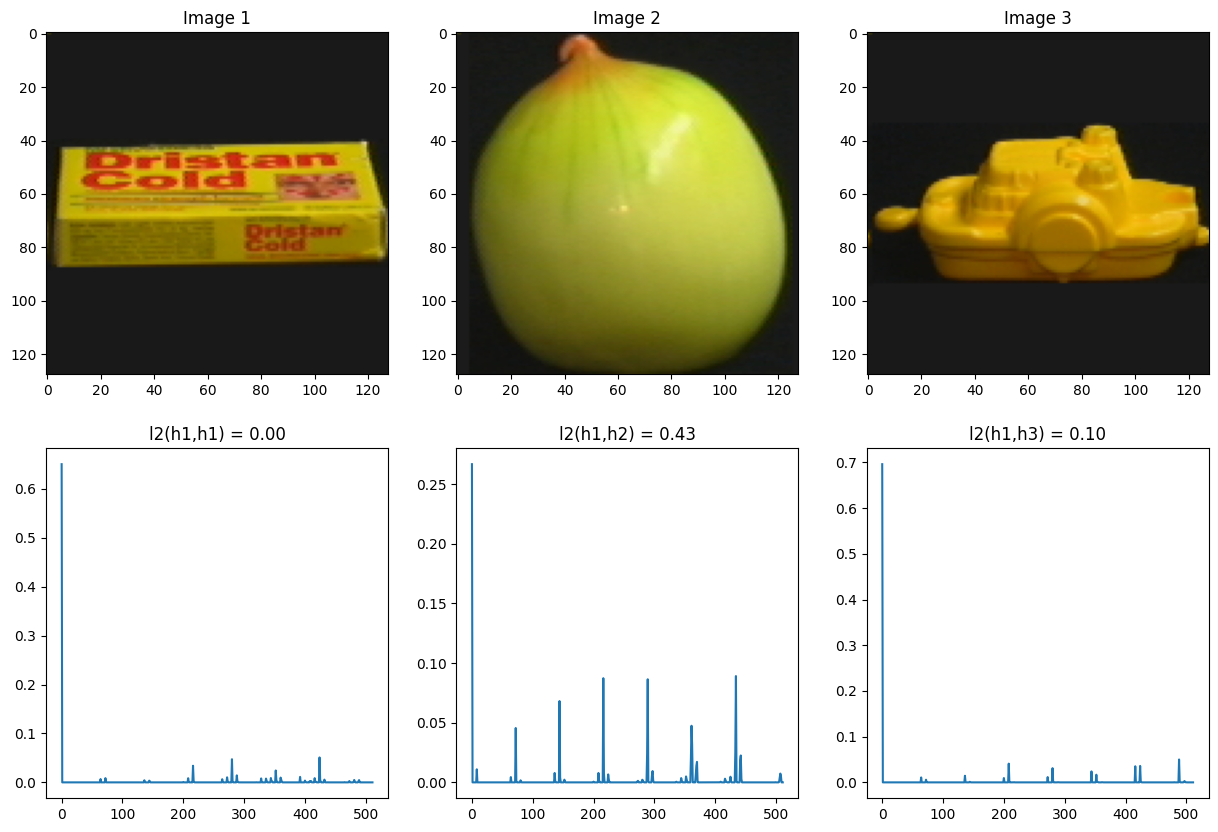

l2(h2,h2) = 0.00
l2(h2,h3) = 0.48
l2(h3,h3) = 0.00
chi-square(h1,h2) = 0.43
chi-square(h1,h3) = 0.13
intersection(h1,h2) = 0.60
intersection(h1,h3) = 0.20
hell(h1,h2) = 0.57
hell(h1,h3) = 0.32


In [18]:
def compare_histograms(h1, h2, metoda):
    assert h1.shape == h2.shape
    
    if metoda == "L2":
        distance = np.sqrt(np.sum((h1 - h2) ** 2))
    
    elif metoda == "chi-square":
        epsilon = 1e-10
        distance = 0.5 * np.sum(((h1 - h2) ** 2) / (h1 + h2 + epsilon))
    
    elif metoda == "intersection":
        distance = 1 - np.sum(np.minimum(h1, h2))
    
    elif metoda == "hell":
        distance = np.sqrt(0.5 * np.sum((np.sqrt(h1) - np.sqrt(h2)) ** 2))
    
    else:
        raise ValueError(f"Napačna metoda: {metoda}")
    
    return distance

image1 = plt.imread('./dataset/object_01_1.png').astype(np.float64)
image2 = plt.imread('./dataset/object_02_1.png').astype(np.float64)
image3 = plt.imread('./dataset/object_03_1.png').astype(np.float64)

hist1 = myhist3(image1, 8)
hist2 = myhist3(image2, 8)
hist3 = myhist3(image3, 8)

L2_1 = compare_histograms(hist1, hist1, "L2")
L2_2 = compare_histograms(hist1, hist2, "L2")
L2_3 = compare_histograms(hist1, hist3, "L2")

L2_4 = compare_histograms(hist2, hist2, "L2")
L2_5 = compare_histograms(hist2, hist3, "L2")
L2_6 = compare_histograms(hist3, hist3, "L2")

C_1 = compare_histograms(hist1, hist2, "chi-square")
C_2 = compare_histograms(hist1, hist3, "chi-square")

I_1 = compare_histograms(hist1, hist2, "intersection")
I_2 = compare_histograms(hist1, hist3, "intersection")

H_1 = compare_histograms(hist1, hist2, "hell")
H_2 = compare_histograms(hist1, hist3, "hell")

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image1)
plt.title('Image 1')

plt.subplot(2, 3, 2)
plt.imshow(image2)
plt.title('Image 2')

plt.subplot(2, 3, 3)
plt.imshow(image3)
plt.title('Image 3')

plt.subplot(2, 3, 4)
plt.plot(hist1.flatten())
plt.title(f'l2(h1,h1) = {L2_1:.2f}')

plt.subplot(2, 3, 5)
plt.plot(hist2.flatten())
plt.title(f'l2(h1,h2) = {L2_2:.2f}')

plt.subplot(2, 3, 6)
plt.plot(hist3.flatten())
plt.title(f'l2(h1,h3) = {L2_3:.2f}')

plt.show()

print(f'l2(h2,h2) = {L2_4:.2f}')
print(f'l2(h2,h3) = {L2_5:.2f}')
print(f'l2(h3,h3) = {L2_6:.2f}')

print(f'chi-square(h1,h2) = {C_1:.2f}')
print(f'chi-square(h1,h3) = {C_2:.2f}')

print(f'intersection(h1,h2) = {I_1:.2f}')
print(f'intersection(h1,h3) = {I_2:.2f}')

print(f'hell(h1,h2) = {H_1:.2f}')
print(f'hell(h1,h3) = {H_2:.2f}')

### Which image (object_02_1.png or object_03_1.png) is more similar to image object_01_1.png considering the L2 distance? How about the other three distances? We can see that all three histograms contain a strongly expressed component (one bin has a much higher value than the others). Which color does this bin represent?

Glede na na L2 razdaljo je object_03_1.png bolj podoben object_01_1.png, ker je L2 razdalja med histogrami object_01_1.png in object_03_1.png manjša kot med object_01_1.png in object_02_1.png. Tudi ostale razdalje kažejo, da je object_03_1.png bolj podoben object_01_1.png kot object_02_1.png.

Črna barva (0,0,0) je tista, ki ima največjo vrednost v histogramu, saj je v vseh treh histogramih največji bin prvi.

In [19]:
def histogram_utezi(histogram, utezi):
    hist_utez = histogram * utezi
    hist_utez /= np.sum(hist_utez)
    return hist_utez

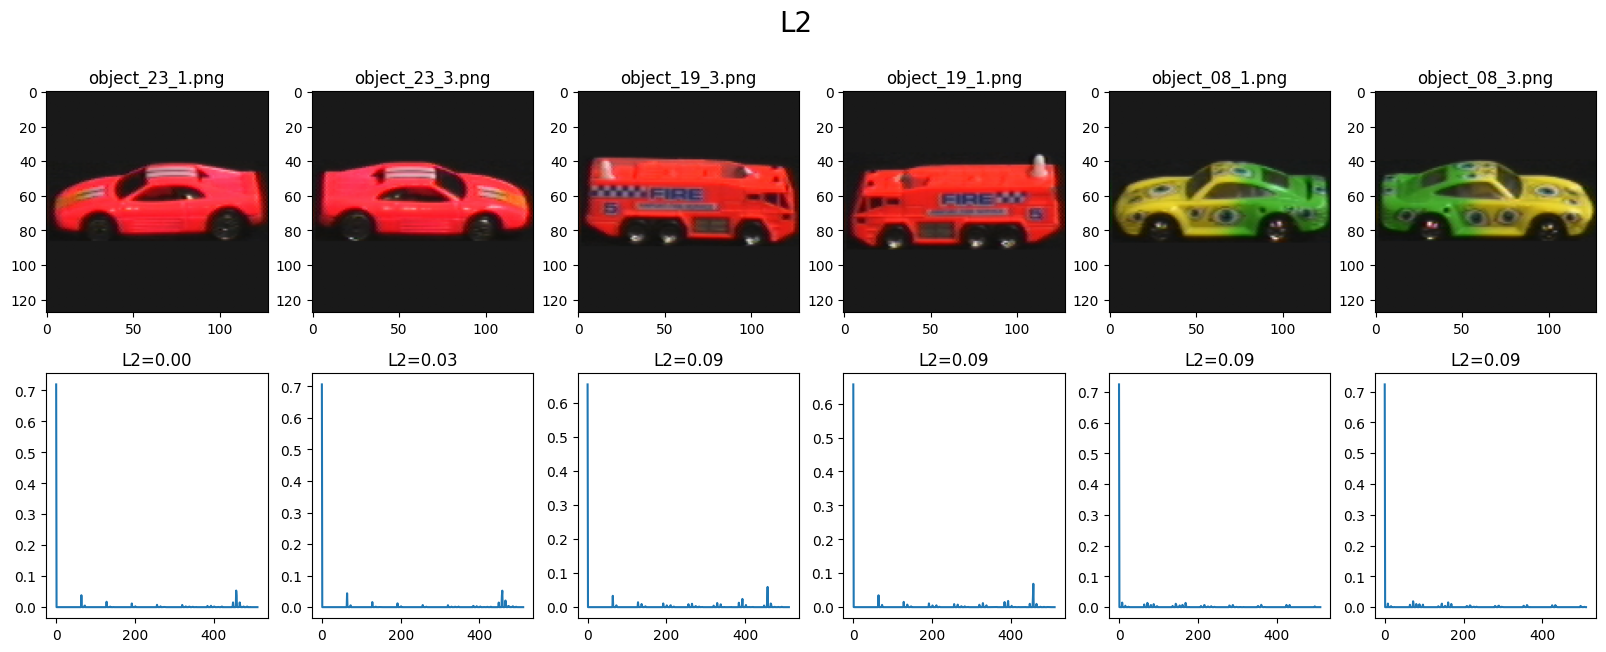

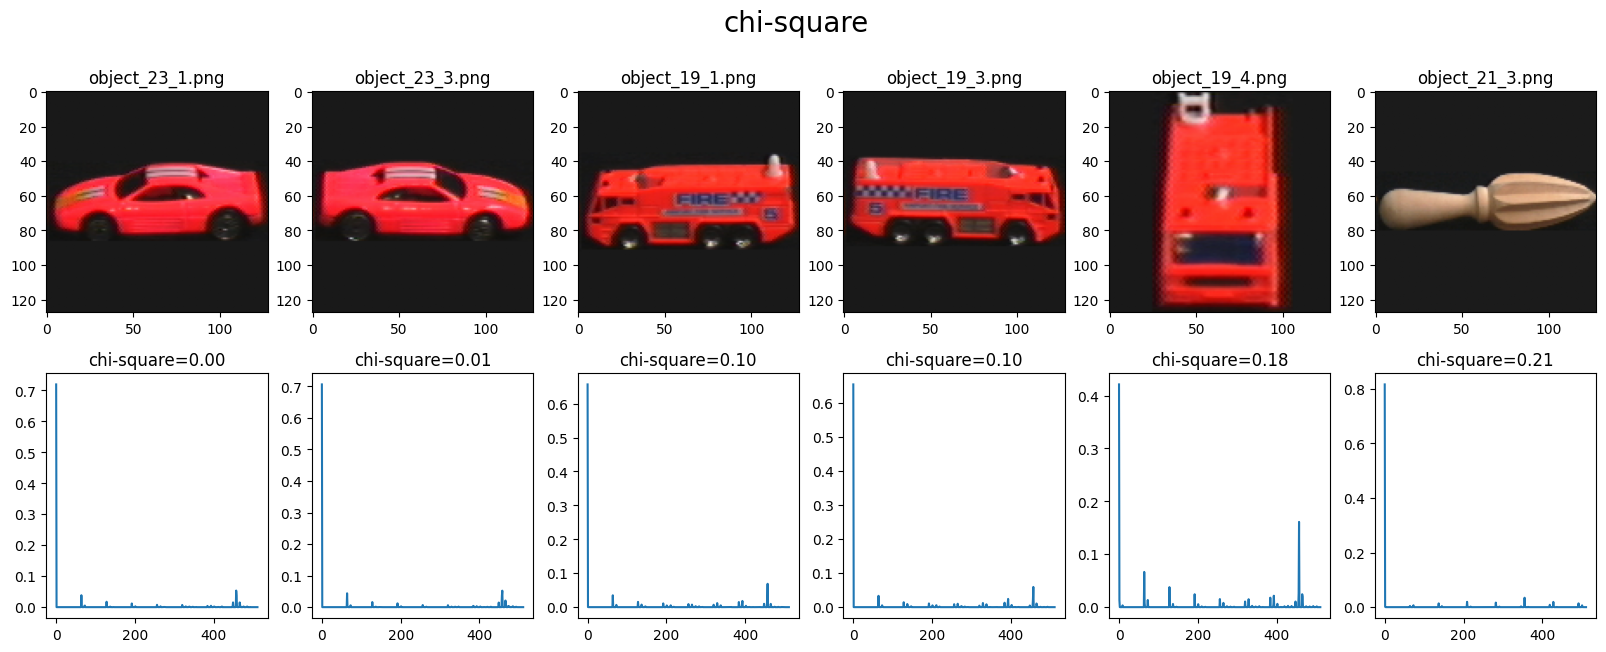

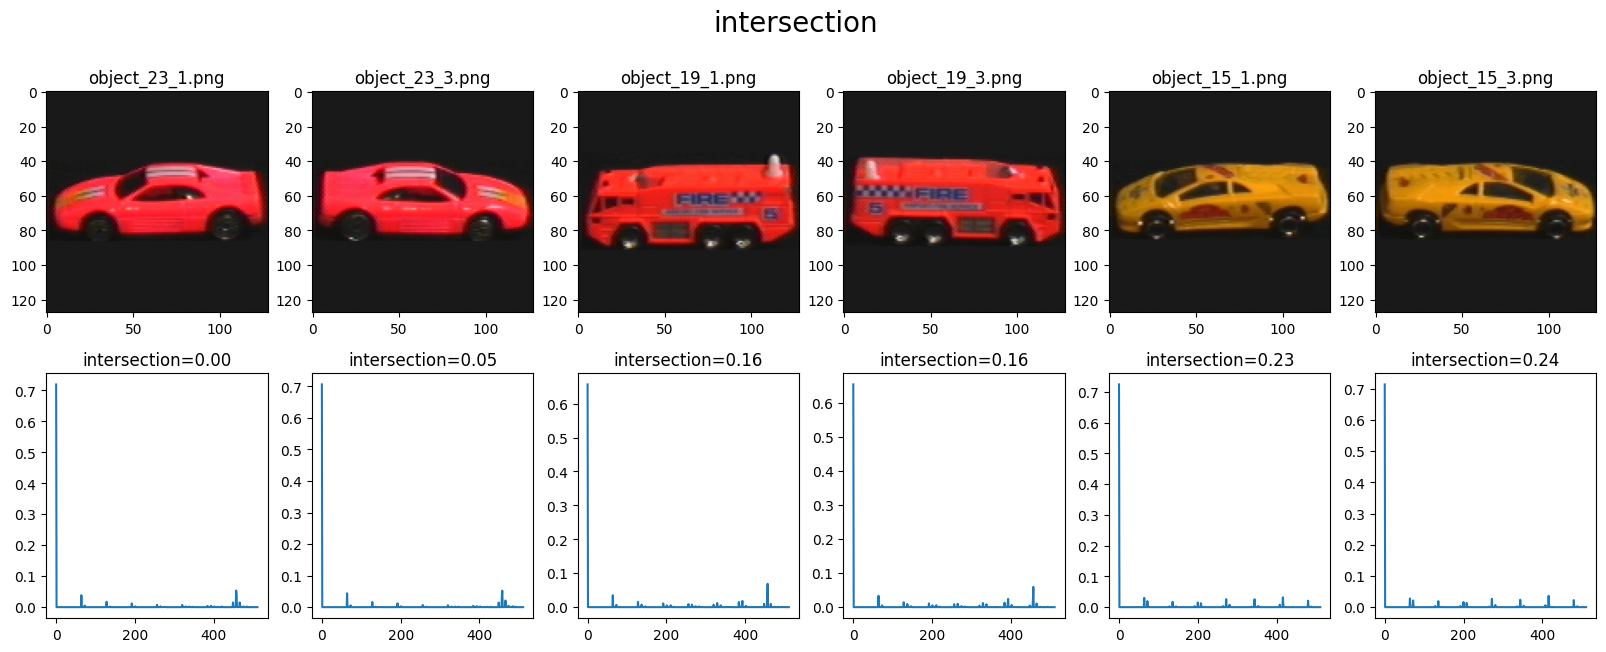

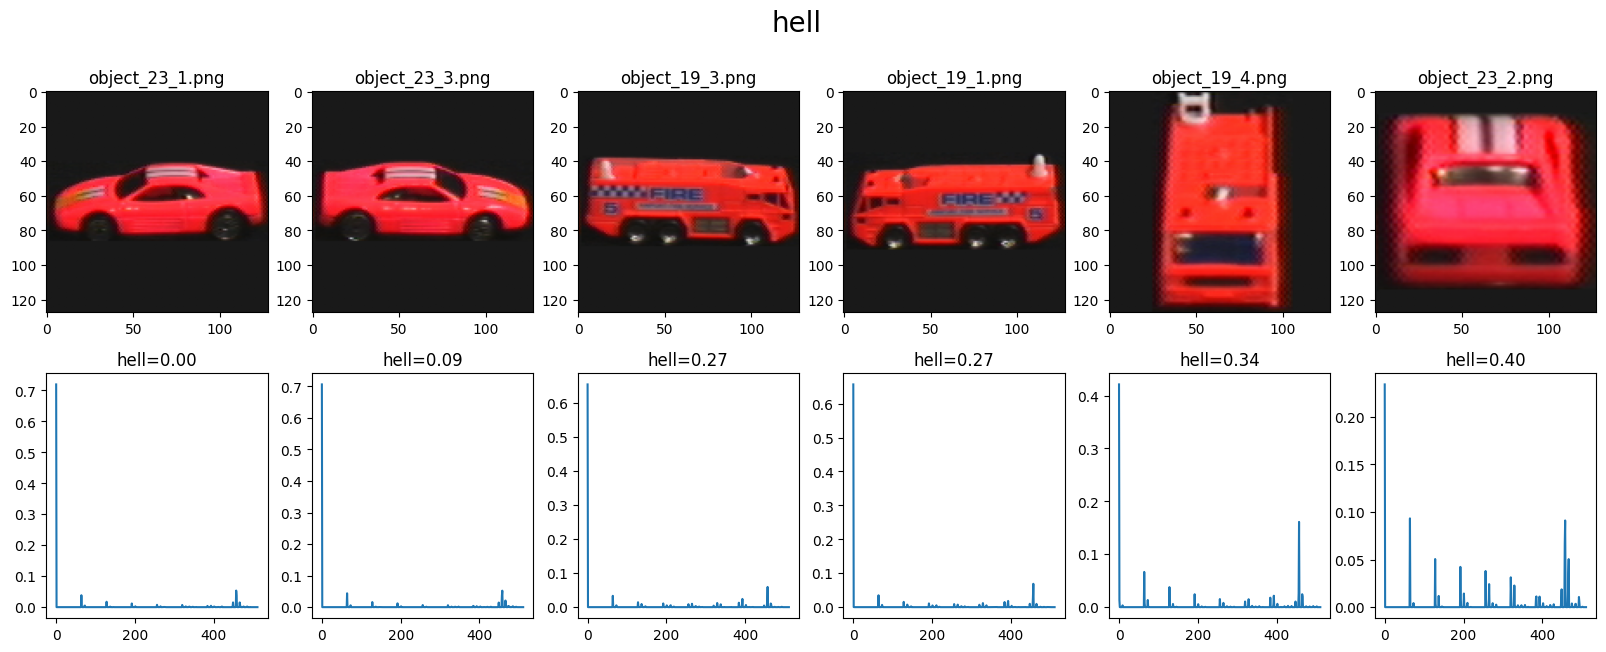

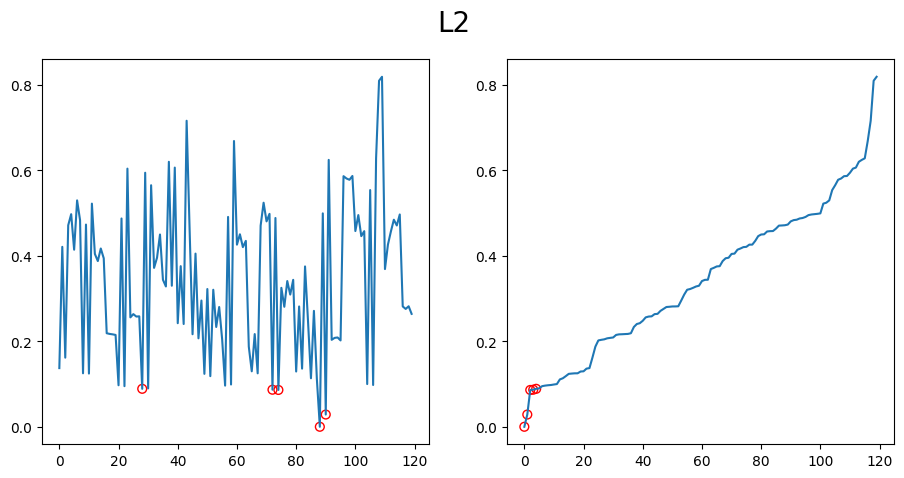

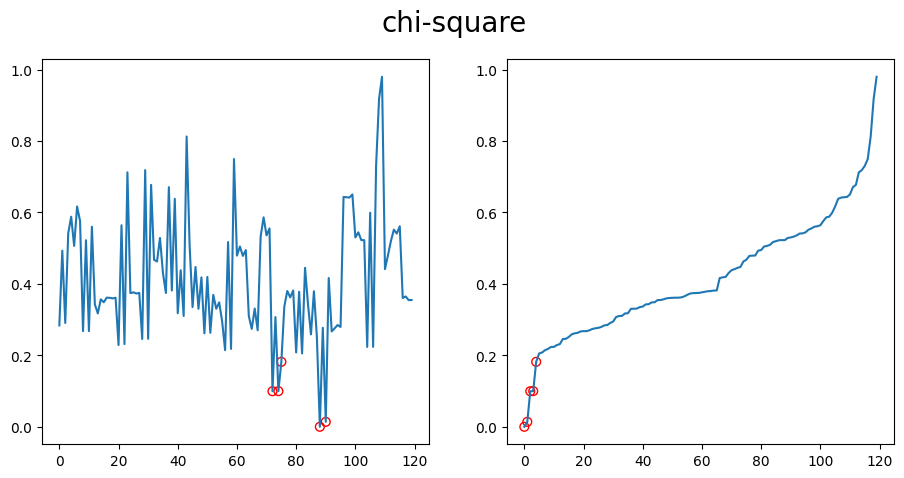

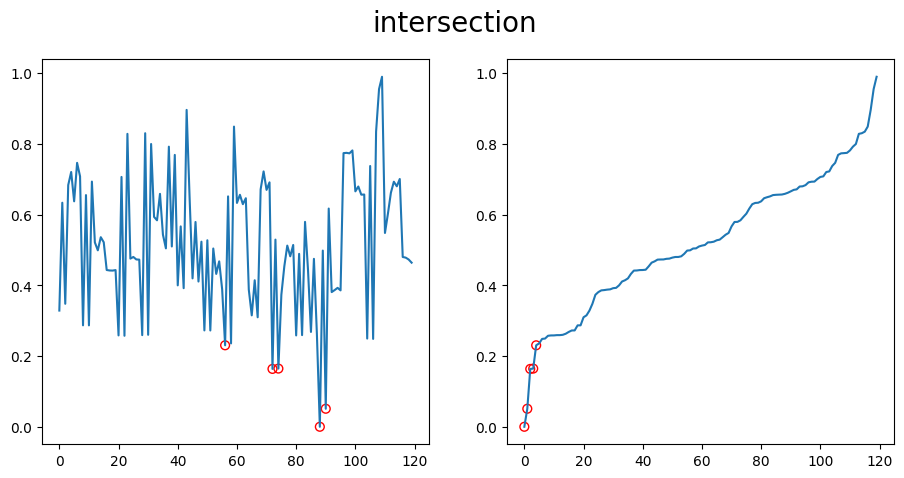

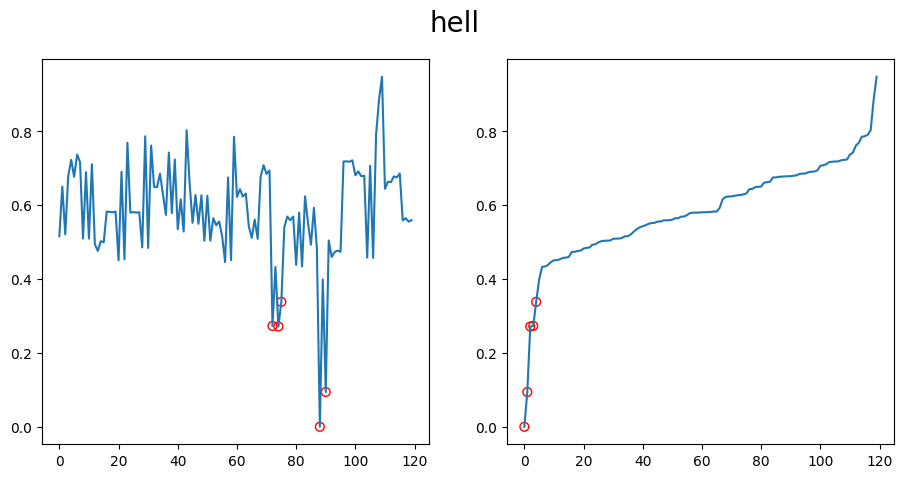

In [20]:
def image_retrieval(directory, slika, n_bins, utezi = [1]):
    histograms = {}
    slika_hist = myhist3(slika, n_bins).flatten()
    slika_hist = histogram_utezi(slika_hist, utezi)
    
    for dat in os.listdir(directory):
        if dat.endswith(".png"):
            image_path = os.path.join(directory, dat)
            image = plt.imread(image_path)
            hist = myhist3(image, n_bins).flatten()
            hist = histogram_utezi(hist, utezi)
            histograms[dat] = hist
    
    razdalja_metode = ['L2', 'chi-square', 'intersection', 'hell']
    results = {metoda: {} for metoda in razdalja_metode}
    
    for metoda in razdalja_metode:
        for dat, hist in histograms.items():
            results[metoda][dat] = compare_histograms(slika_hist, hist, metoda)
    
    for metoda in razdalja_metode:
        images_sorted = sorted(results[metoda], key=results[metoda].get)
        
        plt.figure(figsize=(20, 7))
        plt.suptitle(f"{metoda}", fontsize=20)
        
        for i, filename in enumerate(images_sorted[:6]):
            plt.subplot(2, 6, i + 1)
            image = plt.imread(os.path.join(directory, filename))
            plt.imshow(image)
            plt.title(f"{filename}")
            
            plt.subplot(2, 6, i + 7)
            plt.plot(histograms[filename])
            plt.title(f"{metoda}={results[metoda][filename]:.2f}")
        
        plt.show()
    
    x = np.arange(len(histograms))

    for metoda in razdalja_metode:
        y = [results[metoda][dat] for dat in histograms]
        y_sorted = sorted(y)
        y_min = y_sorted[:5]
        tocke1 = [y.index(i) for i in y_min]
        tocke2 = [y_sorted.index(i) for i in y_min]
        
        plt.figure(figsize=(11, 5))
        plt.suptitle(f"{metoda}", fontsize=20)

        plt.subplot(1, 2, 1)
        plt.plot(x, y)
        plt.scatter(tocke1, y_min, edgecolors='red', facecolors='none', s=40)

        plt.subplot(1, 2, 2)
        plt.plot(x, y_sorted)
        plt.scatter(tocke2, y_min, edgecolors='red', facecolors='none', s=40)

        plt.show()


slika = plt.imread("dataset/object_23_1.png")
image_retrieval("dataset", slika, 8)

### Which distance is in your opinion best suited for image retrieval? How does the retrieved sequence change if you use a different number of bins? Is the execution time affected by the number of bins?

Mislim, da je L2 razdalja (Euclidean distance) najbolj primerna za iskanje slik, ker vse celice so enako utežene in je tudi odporna na šum. Če uporabimo drugo število binov, se vrstni red rezultatov spremeni, saj se bodo histogrami malce razlikovali. Čas se bo povečal, saj je število binov, ki jih je treba obdelati in izračunati L2 razdaljo večje.

In [21]:
def histogram_all(directory, n_bins):
    histogram = np.zeros(n_bins ** 3)
    for dat in os.listdir(directory):
        if dat.endswith(".png"):
            image_path = os.path.join(directory, dat)
            image = plt.imread(image_path)
            hist = myhist3(image, n_bins).flatten()
            histogram += hist
    
    histogram /= np.sum(histogram)

    return histogram

histogram = histogram_all("dataset", 8)

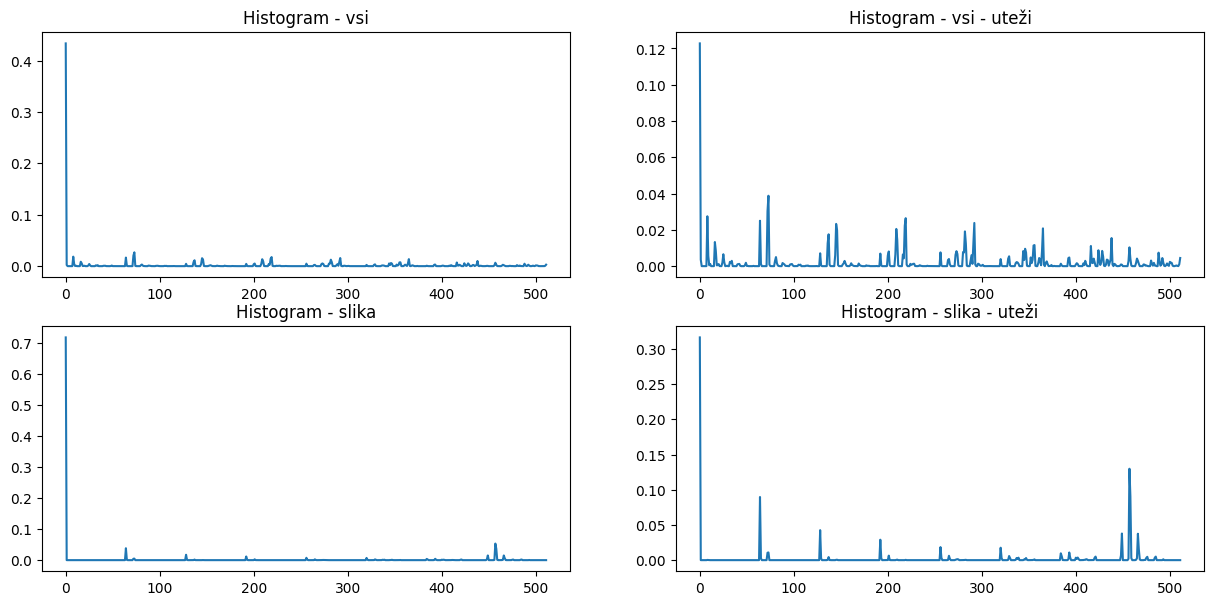

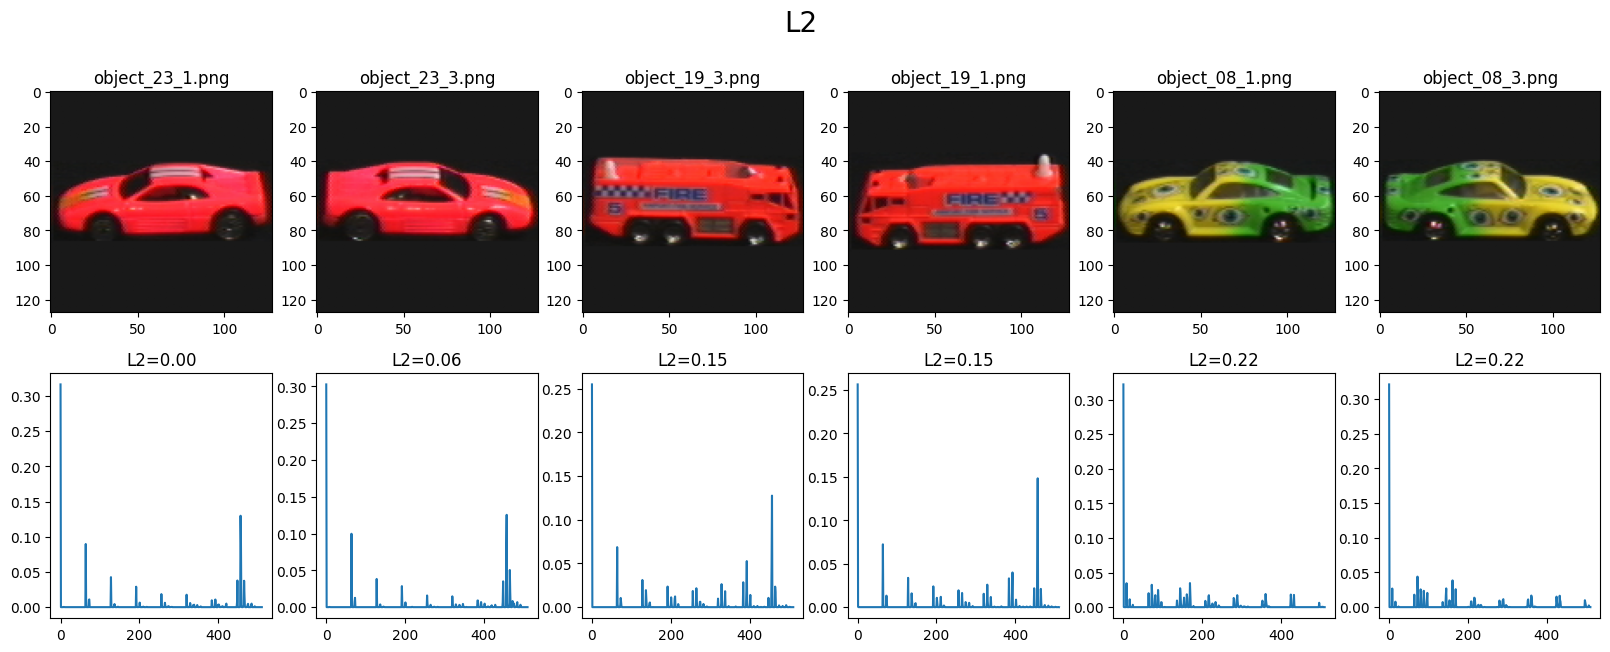

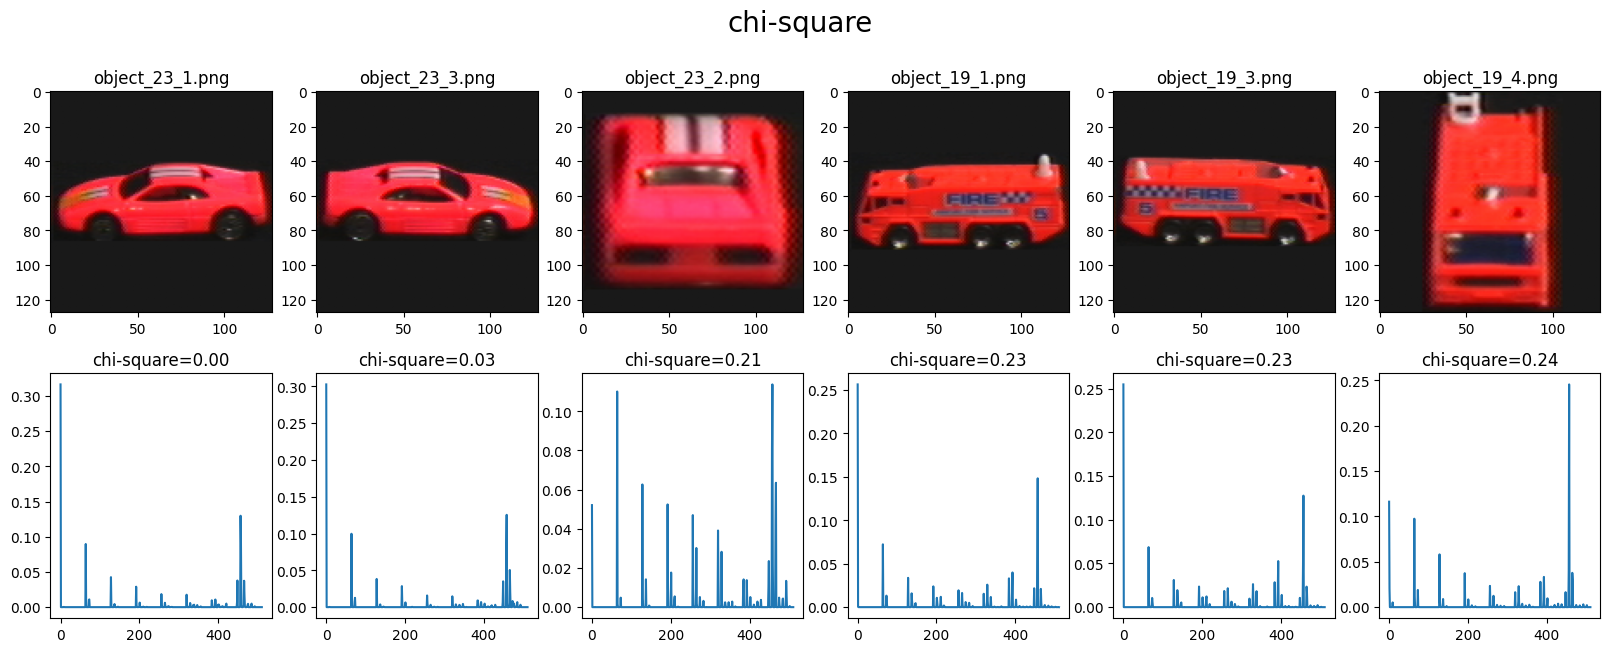

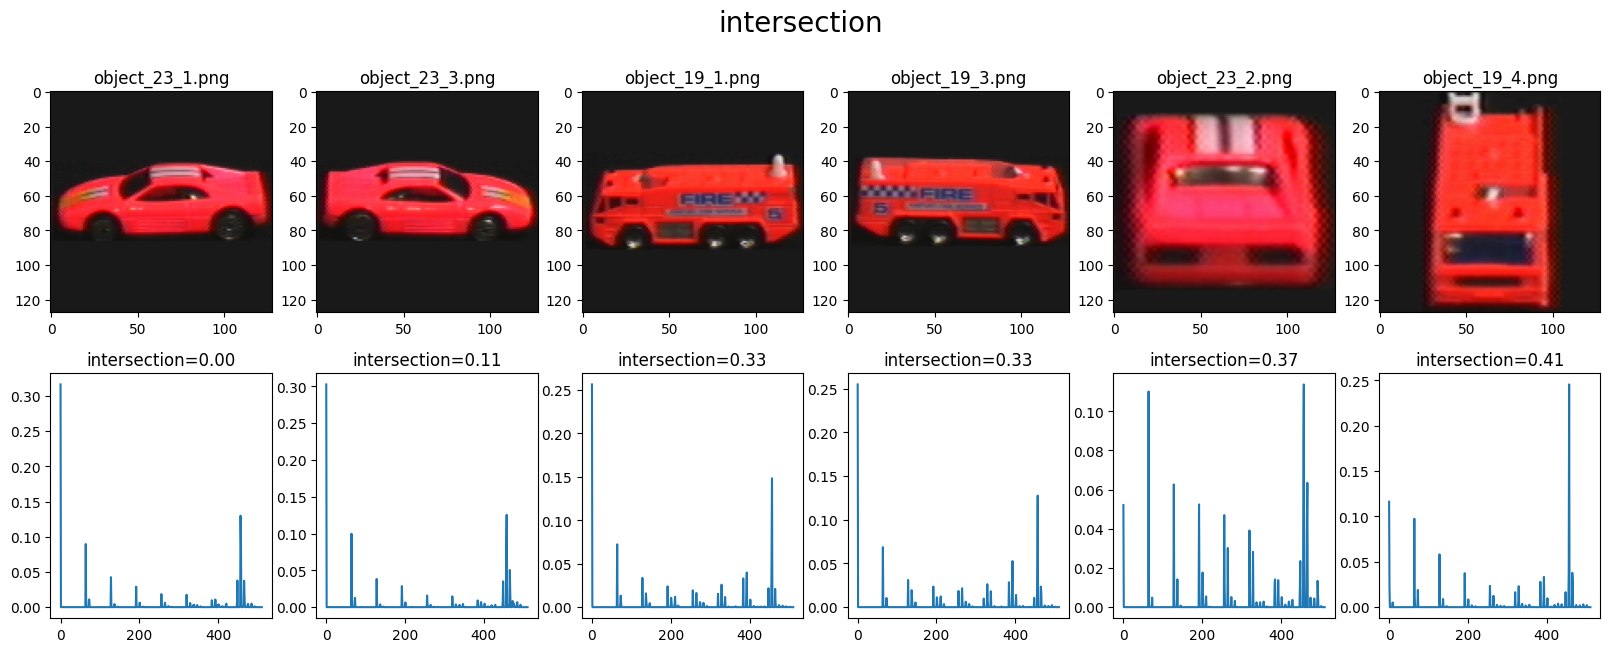

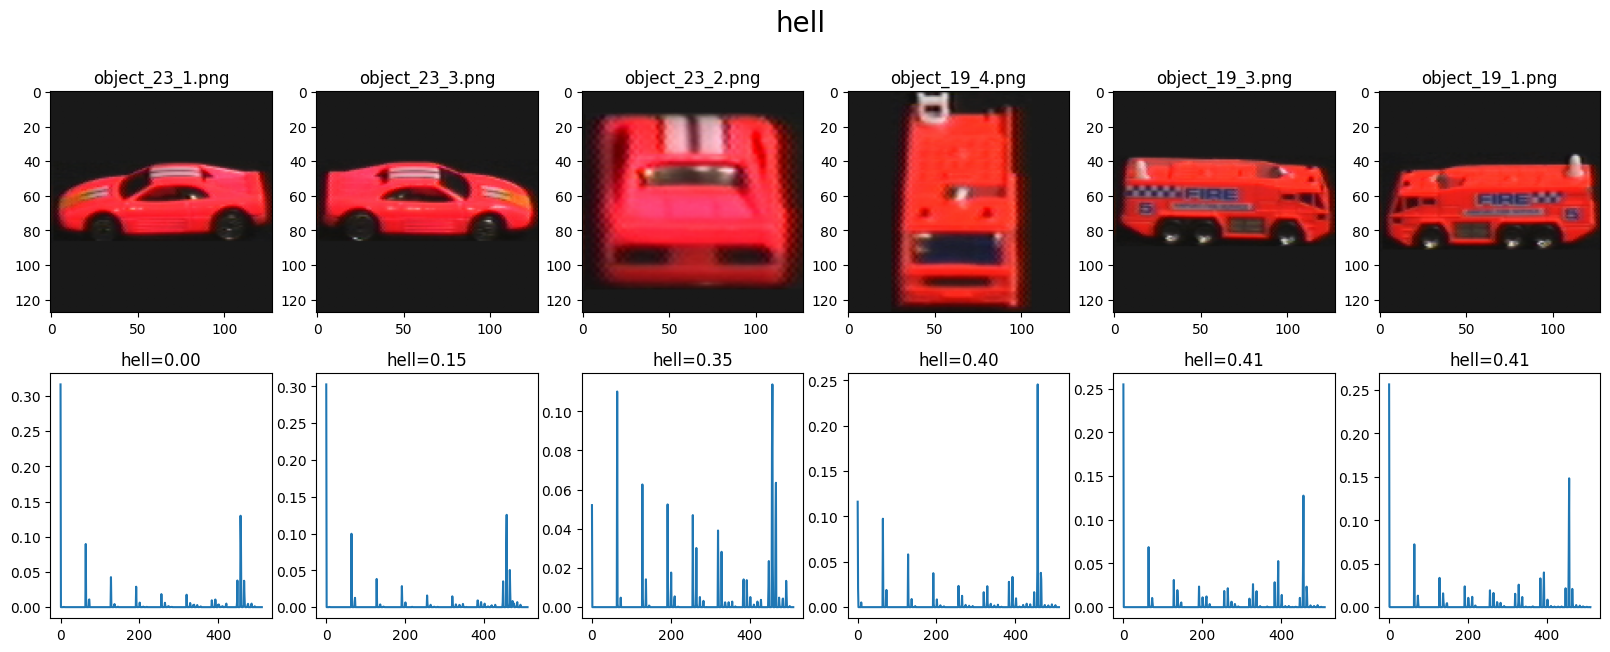

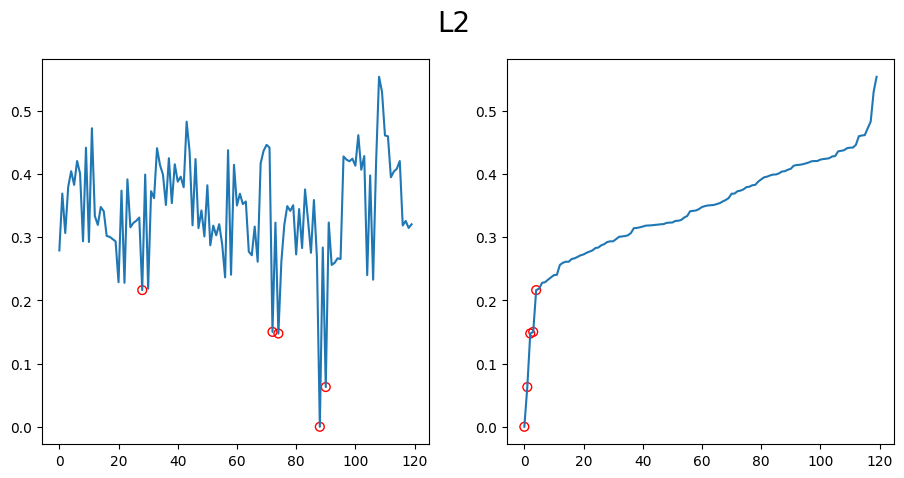

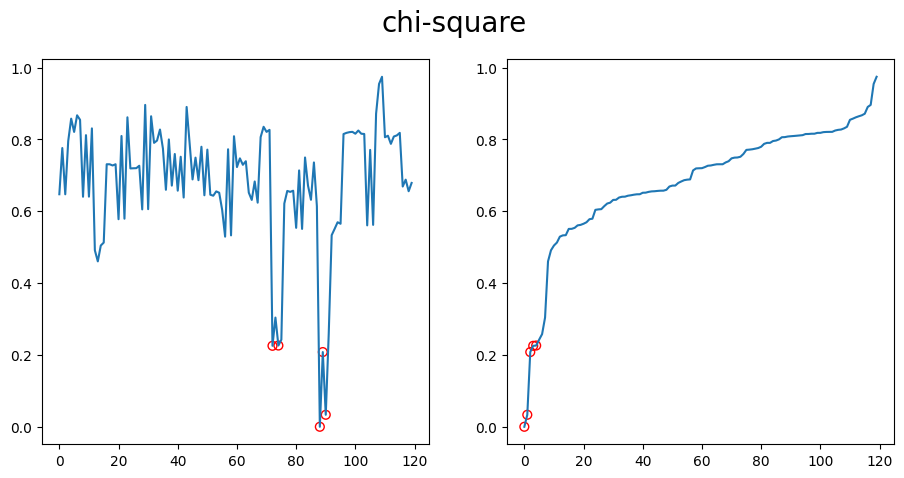

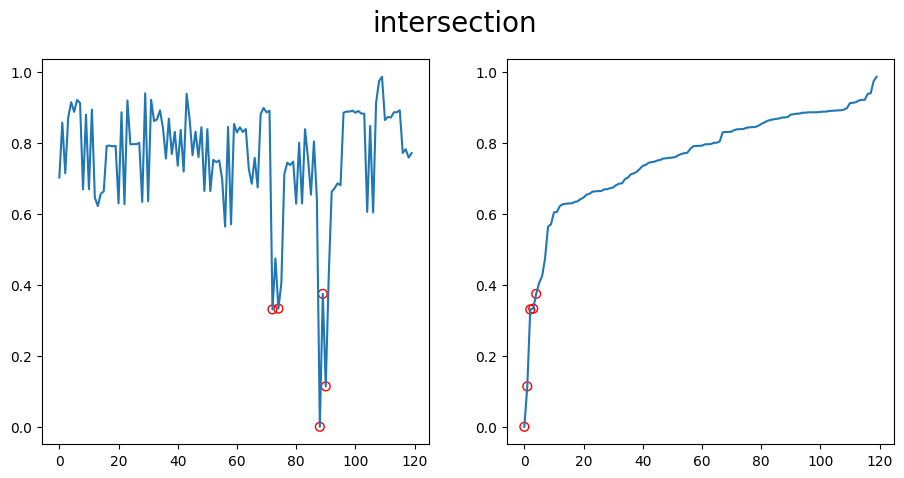

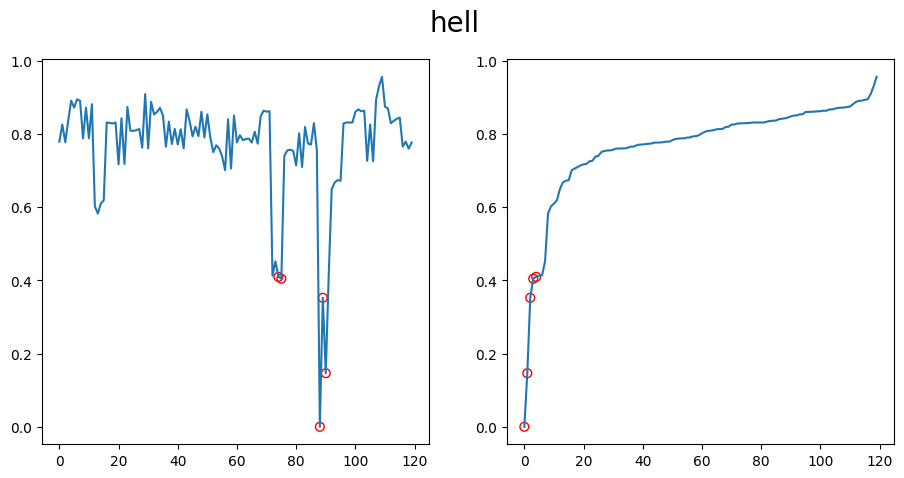

In [22]:
def izracunaj_utezi(histogram, lamda):
    return np.exp(-lamda * histogram)

lamda = 4
utez = izracunaj_utezi(histogram, lamda)
histogram_all_utezi = histogram_utezi(histogram, utez)

image = plt.imread("dataset/object_23_1.png")
hist = myhist3(image, 8).flatten()
hist_utez = histogram_utezi(hist, utez)

plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.plot(histogram)
plt.title('Histogram - vsi')

plt.subplot(2, 2, 2)
plt.plot(histogram_all_utezi)
plt.title('Histogram - vsi - uteži')

plt.subplot(2, 2, 3)
plt.plot(hist)
plt.title('Histogram - slika')

plt.subplot(2, 2, 4)
plt.plot(hist_utez)
plt.title('Histogram - slika - uteži')

plt.show()

image_retrieval("dataset", image, 8, utezi = utez)



### Which bins dominate this histogram? Finally, you can compare the retrieval process for the weighted and the unweighted histograms. Report your observations. Did the weighting help with retrieving relevant results?

Najbolj dominanten bin je črna barva (0,0,0). Pri obteženem histogramu so rezultati malce boljši, saj je obtežen histogram bolj natančen in zato boljši pri iskanju podobnih slik, ker zmanjšuje vpliv dominantnih barv in poudari manj pogoste barve. To se v mojem primeru lepo vidi, saj je z uporabu uteženega histograma našel bolj podobne slike kot pri neobteženem histogramu (samo avtomibili oz. tovornjaki, v primeru neobteženega histograma pa tudi nekaj drugih slik).